In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from pandasql import sqldf
from scripts.profile_reader import ProfileReader

pd.options.display.max_rows = 500
pd.options.display.max_columns = 300
%matplotlib inline

pqry = lambda q: sqldf(q, globals())

In [2]:
pr = ProfileReader(data_file='data\\Final_Berg JBS 2013 Supplemental Table 3_For SVM14Dec2017.xlsx',  
                       mechanism_file='data\\Final_Berg JBS 2013 Supplemental Table 3_For SVM14Dec2017 - Mechanisms.xlsx')
# read in data. Make column 2-level index, level 0 is system, level 1 ir readout
# row indices are mechanism, agent, concentration
data = pr.parse_profiles()

# Impute missing
grouped = data.groupby(data.index.get_level_values(0).values)
f = lambda x: x.fillna(x.mean())
data = grouped.transform(f)

data.columns = [':'.join(col).strip() for col in data.columns.values]

In [33]:
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()

    fig, ax = plt.subplots(figsize=(size, size))
    ax.xaxis.tick_bottom()
    cax = ax.matshow(corr)
    fig.colorbar(cax)

    plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
    plt.yticks(range(len(corr.columns)), corr.columns);
    plt.subtitle('Correlation Matrix of Syste-Readouts', fontsize=16)
    ax.xaxis.set_label_position('bottom') 
        

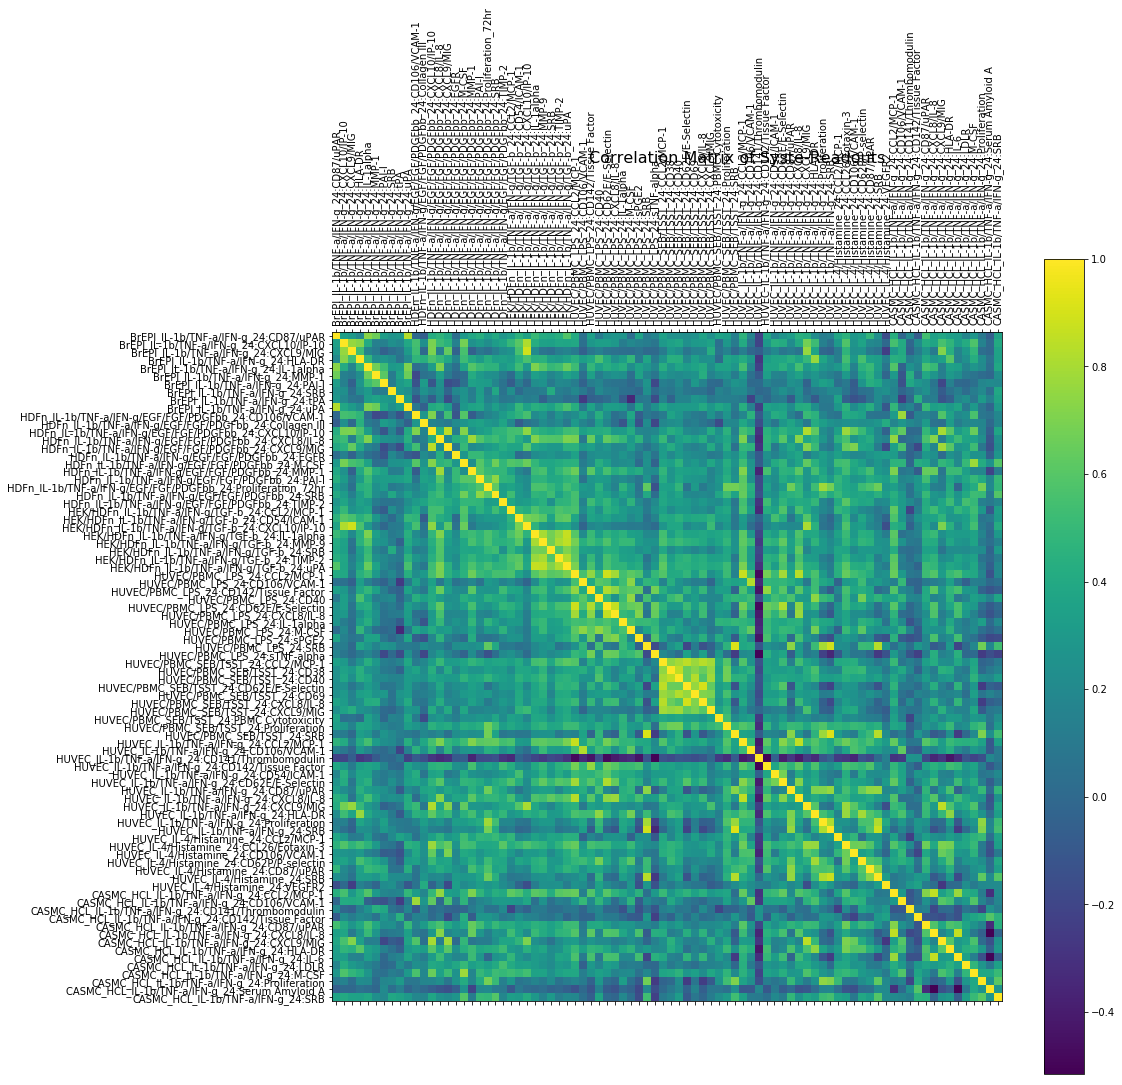

In [32]:
plot_corr(data, size=15)

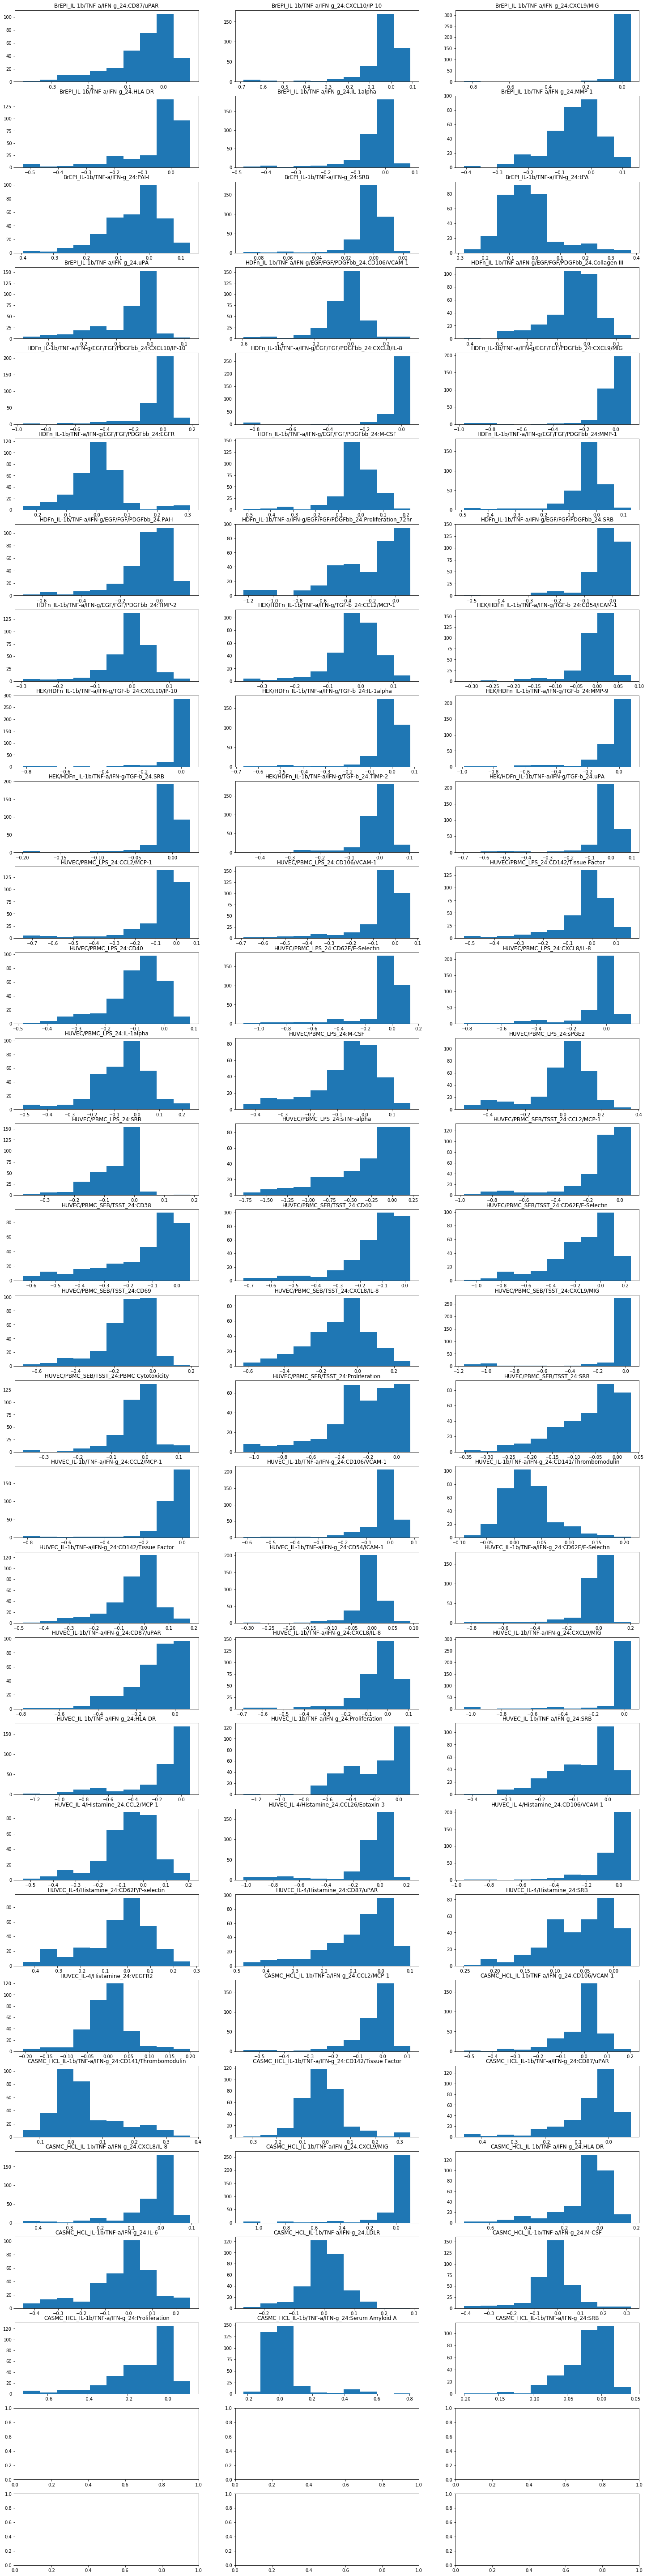

In [55]:
import matplotlib as mpl
mpl.rcParams['figure.max_open_warning'] = 100

fig, ax = plt.subplots(30,3, figsize=(25,105))

for i, col in enumerate(data.columns):
    ax[i//3, i%3].hist(data.iloc[:,i])
    ax[i//3, i%3].set_title(col)
    #ax[i//3, i%3].plot(data.iloc[:,i].plot.hist())
    #plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);